In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm

In [2]:
train_data = pd.read_csv("../train.csv")
test_data = pd.read_csv("../test.csv")

train_data.head()

,x,y
0,34,36.951713
1,77,75.385850
2,70,72.652601
3,55,53.178152
4,14,20.836313


In [3]:
print(f"Train Shape: {train_data.shape}")
print(f"Test Shape: {test_data.shape}")

Train Shape: (1000000, 2)
Test Shape: (1000000, 2)


In [4]:
X_train, y_train = train_data['x'][:10000], train_data['y'][:10000]
X_test, y_test = test_data['x'][:2000], test_data['y'][:2000]

print(f"Train data shape: {X_train.shape} | {y_train.shape}")
print(f"Test data shape: {X_test.shape} | {y_test.shape}")

Train data shape: (10000,) | (10000,)
Test data shape: (2000,) | (2000,)


In [5]:
X_train, y_train = torch.tensor(X_train.values, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32)
X_test, y_test = torch.tensor(X_test.values, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.float32)

print(f"Train data shape: {X_train.shape} | {y_train.shape}")
print(f"Test data shape: {X_test.shape} | {y_test.shape}")

Train data shape: torch.Size([10000]) | torch.Size([10000])
Test data shape: torch.Size([2000]) | torch.Size([2000])


In [6]:
def plot_predictions(train_data: torch.Tensor = X_train,
                     train_labels: torch.Tensor = y_train,
                     test_data: torch.Tensor = X_test,
                     test_labels: torch.Tensor = y_test,
                     plot_test:bool = False,
                     predictions: torch.Tensor = None,
                     ):
    plt.figure(figsize=(5, 4))
    
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    if plot_test:
        plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.plot(test_data, predictions, c="r", label="Predictions")

    plt.legend(prop={"size": 14});

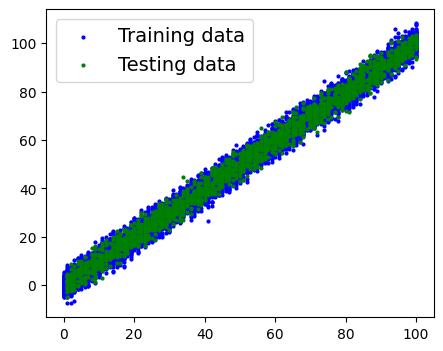

In [7]:
plot_predictions(plot_test=True)

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.w = nn.Parameter(torch.randn(1,
                            requires_grad=True,
                            dtype=torch.float32
                    ))
        self.b = nn.Parameter(torch.randn(1,
                            requires_grad=True,
                            dtype=torch.float32
                    ))
        

    def forward(self, x: torch.Tensor):
        return self.w * x + self.b

In [9]:
loss_function = nn.L1Loss()

In [10]:
linear_model: nn.Module = LinearRegressionModel()
linear_optimizer = optim.SGD(linear_model.parameters(), lr=0.001)

print(f"Linear Model: {linear_model.state_dict()}")

Linear Model: OrderedDict([('w', tensor([-0.1905])), ('b', tensor([0.3366]))])


In [11]:
def train(
        model: nn.Module,
        loss_function: nn.Module,
        optimizer: optim.Optimizer,
        train_data: torch.Tensor = X_train,
        train_labels: torch.Tensor = y_train,
        test_data: torch.Tensor = X_test,
        test_labels: torch.Tensor = y_test,
        num_epochs: int = 100,
    ):
    epochs_count, train_loss_arr, test_loss_arr = [], [], []
    for epoch in tqdm(range(num_epochs+1)):
        model.train()

        y_preds = model(train_data)
        loss = loss_function(y_preds, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_preds = model(test_data)
            test_loss = loss_function(y_preds, test_labels)

            if epoch % 10 == 0:
                epochs_count.append(epoch)
                train_loss_arr.append(loss.detach().numpy())
                test_loss_arr.append(test_loss.detach().numpy())
                print(f"Epoch {epoch}: train loss {loss}, test loss {test_loss}")
    return epochs_count, train_loss_arr, test_loss_arr


def predict(model: nn.Module, data: torch.Tensor) -> torch.Tensor:
    model.eval()
    with torch.inference_mode():
        return model(data)
    
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [12]:
epochs_count, train_loss, test_loss = train(model=linear_model, loss_function=loss_function, optimizer=linear_optimizer, num_epochs=100)

  0%|          | 0/101 [00:00<?, ?it/s]

Epoch 0: train loss 59.60785675048828, test loss 57.127532958984375
Epoch 10: train loss 34.30085372924805, test loss 31.81355857849121
Epoch 20: train loss 9.2915620803833, test loss 6.9155354499816895
Epoch 30: train loss 2.3863887786865234, test loss 2.3637568950653076
Epoch 40: train loss 2.3863790035247803, test loss 2.363762140274048
Epoch 50: train loss 2.3863701820373535, test loss 2.363734483718872
Epoch 60: train loss 2.3863606452941895, test loss 2.363746166229248
Epoch 70: train loss 2.3863511085510254, test loss 2.36373233795166
Epoch 80: train loss 2.3863422870635986, test loss 2.3637192249298096
Epoch 90: train loss 2.3863327503204346, test loss 2.3637125492095947
Epoch 100: train loss 2.3863234519958496, test loss 2.363722562789917


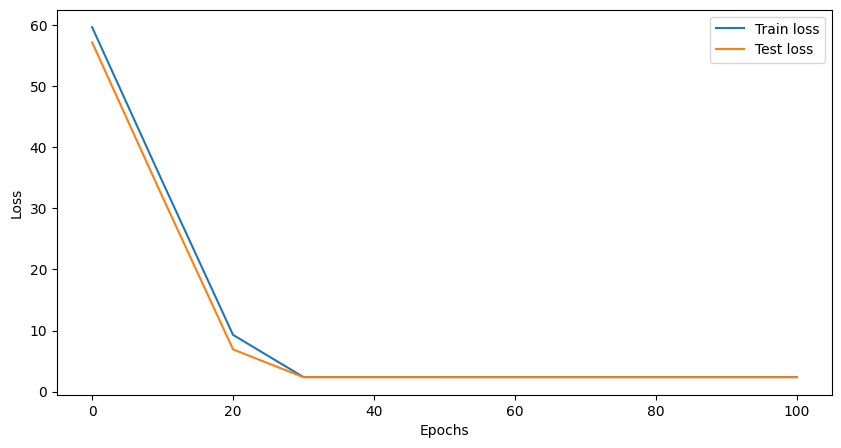

In [13]:
plot_stats(epochs=epochs_count, train_loss=train_loss, test_loss=test_loss)

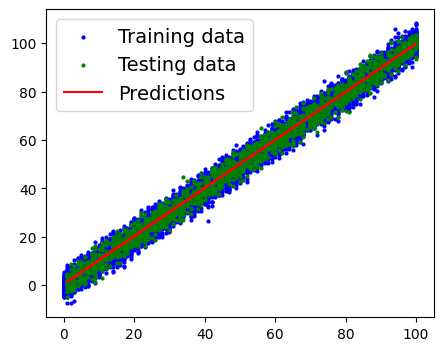

In [14]:
plot_predictions(predictions=predict(linear_model, X_test), plot_test=True)